In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout #using dropout to prevent overfitting

## Get the data and preprocess it 

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
def plot_input_img(i):
    plt.imshow(X_train[0],cmap= 'binary')   #to show the binary image
    plt.title(y_train[i])
    #plt.axes('off')
    plt.show()

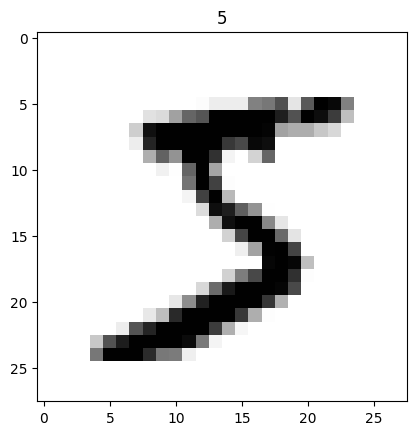

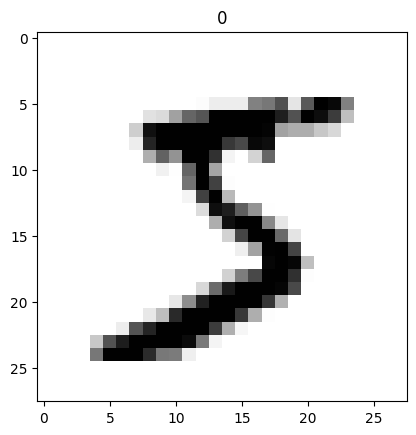

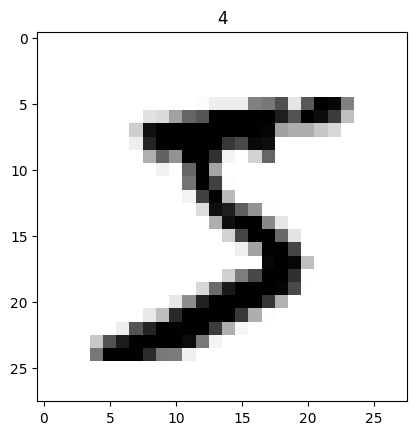

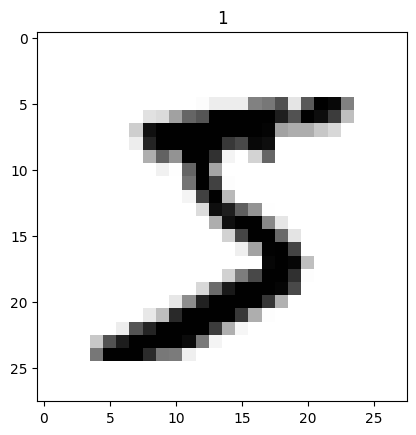

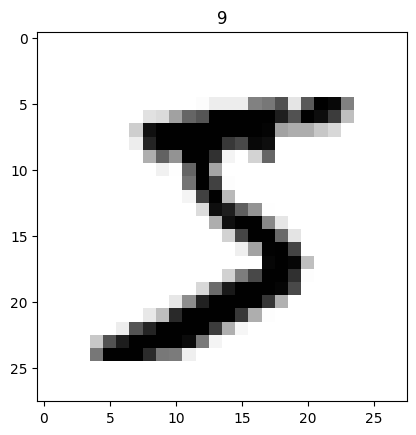

In [6]:
for i in range(5):
    plot_input_img(i)

### Preprocessing data

In [7]:
#Normalizing the image to [0,1] range

X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255
 
#Reshape/ expand the dimensions of images to (28,28,1)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

#convert classes to one hot vector
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3),input_shape = (28,28,1), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
y_train.shape

(60000, 10)

In [13]:
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [14]:
#callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

#earlystopping
es = EarlyStopping(monitor='val_acc', min_delta= 0.01, patience=4 , verbose=1)

#model checkpoint
mc = ModelCheckpoint("./bestmodel.h5",monitor='val_acc',verbose=1,save_best_only=True)

cb = [es,mc]


## Model Training

In [15]:
his = model.fit(X_train, y_train , epochs= 10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 27s 19ms/step - loss: 0.2091 - accuracy: 0.9365 - val_loss: 0.0717 - val_accuracy: 0.9784
Epoch 2/10
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0676 - accuracy: 0.9785 - val_loss: 0.0537 - val_accuracy: 0.9838
Epoch 3/10
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0523 - accuracy: 0.9835 - val_loss: 0.0503 - val_accuracy: 0.9839
Epoch 4/10
1313/1313 [==============================] - 44s 33ms/step - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.0463 - val_accuracy: 0.9863
Epoch 5/10
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0387 - val_accuracy: 0.9888
Epoch 6/10
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0389 - val_accuracy: 0.9879
Epoch 7/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0450 -

In [17]:
score = model.evaluate(X_test, y_test)
print("Score is:", score)
#print("Accuracy:", accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.0367 - accuracy: 0.9890
Score is: [0.03669333830475807, 0.9890000224113464]


In [18]:
model.save("model/model.h5")

c:\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
model_S = keras.models.load_model("C://Users//HP//OneDrive//Desktop//python//model//model.h5")

In [22]:
score = model_S.evaluate(X_test,y_test)
print(f"the model accuracy is {score[1]}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0367 - accuracy: 0.9890
the model accuracy is 0.9890000224113464
